Function to go from cartesian coordinates with origin at galactic centre to cartesian with origin at Earth

In [1264]:
import numpy as np

In [1265]:
def gctoec(a):
    b=a.copy()
    b[0]=b[0]+8.5
    return b


Function to go from cartesian coordinates with origin at Earth to cartesian with origin at galactic centre

In [1266]:
def ectogc(a):
    b=a.copy()
    b[0]=b[0]-8.5
    return b

Function to go from cylindrical coordinates $(r,\phi,z)$ to cartesian coordinates $(x,y,z)$

In [1267]:
def cytoca(a):
    b=np.array([0.0,0.0,0.0])
    b[0]=(np.cos(a[1]))*a[0]
    b[1]=(np.sin(a[1]))*a[0]
    b[2]=a[2]
    return b

Function to go from cartesian coordinates $(x,y,z)$ to cylindrical coordinates $(r,\phi,z)$

In [1268]:
def catocy(a):
    b=np.array([0.0,0.0,0.0])
    b[2]=a[2]
    b[0]=np.sqrt(a[0]**2+a[1]**2)
    if a[0]==0 and a[1]>0:
        b[1]=np.pi/2
    if a[0]==0 and a[1]<0:
        b[1]=3*np.pi/2
    if a[0]==0 and a[1]==0:
        b[1]=0
    if a[0]>0 and a[1]>=0:
        b[1]=np.arctan(a[1]/a[0])
    if a[0]>0 and a[1]<0:
        b[1]=2*np.pi+np.arctan(a[1]/a[0])
    if a[0]<0 :
         b[1]=np.pi+np.arctan(a[1]/a[0])
    return b
        

Function to take a vector field in cylindrical coordinates $f(r,\phi,z)\hat{r}+g(r,\phi,z)\hat{\phi}+h(r,\phi,z)\hat{z}$ and convert it to $ X(x,y,z) \hat{x} + Y(x,y,z) \hat{y}+Z(x,y,z) \hat{z}$

In [1269]:
def vecfcytoca(a): # a is an array of functions f,g,h each of which return real numbers given an array. 
    def X(x):
        y=catocy(x)
        return   a[0](y)*np.cos(y[1])-a[1](y)*np.sin(y[1])
    def Y(x):
        y=catocy(x)
        return   a[0](y)*np.sin(y[1])+a[1](y)*np.cos(y[1])
    def Z(x):
        y=catocy(x)
        return a[2](y)
    return np.array([X,Y,Z])
    
        
        
 

Function to take a vector field in cartesian coordinates with origin at galactic centre and convert it to cartesian coordinates with origin at Earth (x= -8.5 kpc)
    
   

In [1270]:
def cagctocae(a):
    def X(x):
        y=ectogc(x)
        return a[0](y)
    def Y(x):
        y=ectogc(x)
        return a[1](y)
    def Z(x):
        y=ectogc(x)
        return a[2](y)
    return np.array([X,Y,Z])
    
    

Function to take spherical polar coordinates $(r,\theta,\phi)$ to cartesian coordinates $(x,y,z)$

In [1271]:
def sptoca(a):
    b=np.array([0.0,0.0,0.0])
    b[0]=np.sin(a[1])*np.cos(a[2])*a[0]
    b[1]=np.sin(a[1])*np.sin(a[2])*a[0]
    b[2]=np.cos(a[1])*a[0]
    return b

Function to take vector field in cartesian coordinates  $ X(x,y,z) \hat{x} + Y(x,y,z) \hat{y}+Z(x,y,z) \hat{z}$ to spherical polar coordinates $f(r,\theta,\phi)\hat{r}+g(r,\theta,\phi)\hat{\theta}+h(r,\theta,\phi)\hat{\phi}$

In [1272]:
def vecfcatosp(a):
    def f(x):
        y=sptoca(x)
        return a[0](y)*np.sin(x[1])*np.cos(x[2])+a[1](y)*np.sin(x[1])*np.sin(x[2])+a[2](y)*np.cos(x[1])
    def g(x):
        y=sptoca(x)
        return a[0](y)*np.cos(x[1])*np.cos(x[2])+a[1](y)*np.cos(x[1])*np.sin(x[2])-a[2](y)*np.sin(x[1])
    def h(x):
        y=sptoca(x)
        return -1*a[0](y)*np.sin(x[2])+a[1](y)*np.cos(x[2])
    return np.array([f,g,h])

Function to take a scalar function from cylindrical to cartesian coordinates 

In [1273]:
def scalfcytoca(a):
    def f(x):
        y=catocy(x)
        return a(y)
    return f

Function to take a scalar function from galaxy centre coordinates to earth centre coordinates

In [1274]:
def scalfgctoec(a):
    def f(x):
        y=ectogc(x)
        return a(y)
    return f
        
    

Function to go from scalar function in cartesian coordinates to spherical coordinates 

In [1275]:
def scalfcatosp(a):
    def f(x):
        y=sptoca(x)
        return a(y)
    return f

Function to identify which spiral region a point is in given cylindrical coordinates $(r,\phi,z)$

In [1276]:
def regionfinder(a):
    r=a[0]
    phi=a[1]-np.pi
    alpha=np.deg2rad(11.5)
    radii=np.array([5.1,6.3,7.1,8.3,9.8,11.4,12.7,15.5])
    for n in range(-5,6):
        if radii[0]*np.exp(np.tan(alpha)*(phi+2*n*np.pi))<=r and radii[0]*np.exp(np.tan(alpha)*(phi+2*(n+1)*np.pi))>r:
            psi=phi+2*n*np.pi
            break
            
    if radii[1]*np.exp(psi*np.tan(alpha))>r:
        return 1
    elif radii[2]*np.exp(psi*np.tan(alpha))>r:
        return 2
    elif radii[3]*np.exp(psi*np.tan(alpha))>r:
        return 3
    elif radii[4]*np.exp(psi*np.tan(alpha))>r:
        return 4
    elif radii[5]*np.exp(psi*np.tan(alpha))>r:
        return 5
    elif radii[6]*np.exp(psi*np.tan(alpha))>r:
        return 6
    elif radii[7]*np.exp(psi*np.tan(alpha))>r:
        return 7
    else:
        return 8

    

Defining the radial component of the spiral magnetic field in cylindrical coordinates $f(r,\phi,z) \hat{r} $

In [1277]:
def bspiralrad(a):
    r=a[0]
    phi=a[1]
    alpha=np.deg2rad(11.5)
    bstrengths=np.array([0.1,3.,-0.9,-0.8,-2.,-4.2,0.,2.7])
    i=regionfinder(a)-1
    return bstrengths[i]*5/r*np.sin(alpha) 

Defining the azimuthal component of the spiral magnetic field in cylindrical coordinates $g(r,\phi,z) \hat{\phi} $

In [1278]:
def bspiralazi(a):
    r=a[0]
    phi=a[1]
    alpha=np.deg2rad(11.5)
    bstrengths=np.array([0.1,3.,-0.9,-0.8,-2.,-4.2,0.,2.7])
    i=regionfinder(a)-1
    return bstrengths[i]*5/r*np.cos(alpha) 

Defining the z-component of the spiral magnetic field $h(r,\phi,z) \hat{z} $

In [1279]:
def bspiralzf(a): #f stands for final
    return 0

Defining the transition function $ L(z,h,w)= (1+e^{-2\frac{|z|-h}{w}})^{-1} $

In [1280]:
def tran(z,h,w):
    return 1/(1+np.exp(-2*(abs(z)-h)/w))

Appending this to our disc field and adding the conditions r<3 , 3<r<5, 5<r<20 and r>20 conditions 

In [1281]:
hdisc=0.40

In [1282]:
wdisc=0.27

In [1283]:
bring=0.1

In [1284]:
def bspiralradf(a):
    if (a[0]<=5 or a[0]>=20):
        return 0
    else:
        return bspiralrad(a)*(1-tran(a[2],hdisc,wdisc))
    
    

In [1285]:
def bspiralazif(a):
    if (a[0]<=3 or a[0]>=20):
        return 0
    elif (3<a[0]<=5):
        return bring*(1-tran(a[2],hdisc,wdisc))
    else:
        return bspiralazi(a)*(1-tran(a[2],hdisc,wdisc))
    
     

Note that we are now done with the disc field in cylindrical coordinates with the origin at the galactic centre:$ (bspiralradf, bsprialazif,bspiralzf) $

Now the halo field is purely azimuthal and also symmetric in $\phi $.Here are the involved parameters:

In [1286]:
Bn = 1.4 
Bs = -1.1
rn = 9.22
rs =16.7
wh = 0.20 
z0 = 5.3 

In [1287]:
def bhaloazi(a):
    
    if a[2]>=0:
        return tran(a[2],hdisc,wdisc)*np.exp(-abs(a[2])/z0)*Bn*(1-tran(a[0],rn,wh))
    elif a[2]<0:
        return tran(a[2],hdisc,wdisc)*np.exp(-abs(a[2])/z0)*Bs*(1-tran(a[0],rs,wh))
    

Finally the out of plane field has the following parametres:


In [1288]:
BX = 4.6 
theta0 =np.deg2rad(49)
rcX = 4.8 
rX = 2.9 

In [1289]:
def bx(r):
    return BX*np.exp(-r/rX)

In [1290]:
def thetaX(a):
    if a[0]==0:
        return np.pi/2
    
    elif a[0]<rcX+abs(a[2])/np.tan(theta0):
        return np.arctan((np.tan(theta0)/a[0])*(rcX+abs(a[2])/np.tan(theta0)))
    else:
        return theta0
                         
   
                         
                        
                         
    

In [1291]:
def rp(a):
    return (a[0]*rcX)/(rcX+abs(a[2])/np.tan(theta0))

In [1292]:
def bXrad(a):
    if thetaX(a)>theta0:
        B=bx(rp(a))*(rp(a)/a[0])**2
        if a[2]>=0:
            return B*np.cos(thetaX(a))
        else:
            return -B*np.cos(thetaX(a))
        
    else:
        p=a[0]-abs(a[2])/np.tan(theta0)
        B=bx(p)*(p/a[0])
        if a[2]>=0:
            return B*np.cos(theta0)
        else:
            return -B*np.cos(theta0)
        
    

In [1293]:
def bXz(a):
    if thetaX(a)>theta0:
        B=bx(rp(a))*(rp(a)/a[0])**2
        return B*np.sin(thetaX(a))
    else:
        p=a[0]-abs(a[2])/np.tan(theta0)
        B=bx(p)*(p/a[0])
        return B*np.sin(theta0)
    

Now we construct the different components of the total magnetic field and set it to 0 in a 1kpc sphere around the galactic centre and also to 0 outside r>20 kpc

In [1294]:
def bradtotal(a):
    if a[0]**2+a[2]**2<=1 or a[0]>20 :
        return 0
    else: 
        return bspiralradf(a)+bXrad(a)

In [1295]:
def bazitotal(a):
    if a[0]**2+a[2]**2<=1 or a[0]>20:
        return 0
    else:
        return bspiralazif(a)+bhaloazi(a)

In [1296]:
def bztotal(a):
    if a[0]**2+a[2]**2<=1 or a[0]>20:
        return 0
    else:
        return bXz(a)

Now we construct the total vector field array $(f,g,h)$ where the magnetic field in cylindrical coordinates with origin at the galactic center is $f(r,\phi,z)\hat{r}+g(r,\phi,z)\hat{\phi}+h(r,\phi,z)\hat{z}$

In [1297]:
bmag=np.array([bradtotal,bazitotal,bztotal])

To get this to spherical coordinates with the origin at the Earth, we first convert it to cartesian coordinates with origin at GC, then cartesian coordinates with origin at Earth, and then spherical with origin at Earth using the functions created above.

In [1298]:
bmagfinal= vecfcatosp(cagctocae(vecfcytoca(bmag)))

Now if $\vec{B}=f(r,\theta,\phi)\hat{r}+g(r,\theta,\phi)\hat{\theta}+h(r,\theta,\phi)\hat{\phi}$ in spherical coordinates centred at Earth then $ bmagfinal[0]=f,  bmagfinal[1]=g, bmagfinal[2]=h $ and we are done with the magnetic field

Next we try to to reproduce fig.1 from https://arxiv.org/pdf/1404.7741.pdf by calculating the average transverse magnetic field along a line starting at 20kpc from Earth at different $(\theta,\phi)$ 

In [1299]:
def bmagrad(r,theta,phi):
    x=np.array([r,theta,phi],dtype=float)
    return bmagfinal[0](x)

In [1300]:
def bmagtheta(r,theta,phi):
    x=np.array([r,theta,phi],dtype=float)
    return bmagfinal[1](x)

In [1301]:
def bmagphi(r,theta,phi):
    x=np.array([r,theta,phi],dtype=float)
    return bmagfinal[2](x)

In [1302]:
def bperp(r,theta,phi):
    return np.sqrt(bmagphi(r,theta,phi)**2+bmagtheta(r,theta,phi)**2)

In [1303]:
from scipy.integrate import quad

In [1304]:
def bavg(theta:float,phi:float)-> float:
    def bperpint(r):
        return 0.05*bperp(r,theta,phi)
    return quad(bperpint,0,20)[0]

In [1305]:
x=np.arange(-np.pi,np.pi,np.pi/100)

In [1306]:
y=np.arange(-np.pi/2,np.pi/2,np.pi/100)

In [1307]:
bavgarr=np.zeros((100,200))

In [1308]:
for i in range(100):
    for j in range(200):
        if x[j]>=0:
            phi=x[j]
        else:
            phi=2*np.pi+x[j]
        theta=np.pi/2-y[i]
        bavgarr[i][j]=bavg(theta,phi)

/var/folders/2g/rfddqxpd70l_bwhpsfnbknvr0000gn/T/ipykernel_12449/2323979259.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(bperpint,0,20)[0]
/var/folders/2g/rfddqxpd70l_bwhpsfnbknvr0000gn/T/ipykernel_12449/2323979259.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(bperpint,0,20)[0]


In [1309]:
import matplotlib.pyplot as plt

In [1310]:
X,Y=np.meshgrid(x,y)

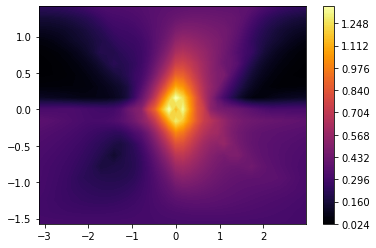

In [1311]:
plt.contourf(X,Y,bavgarr,cmap='inferno',levels=200)
plt.colorbar()

The above code takes some time to run, so I have attached a picture of the resulting plot:
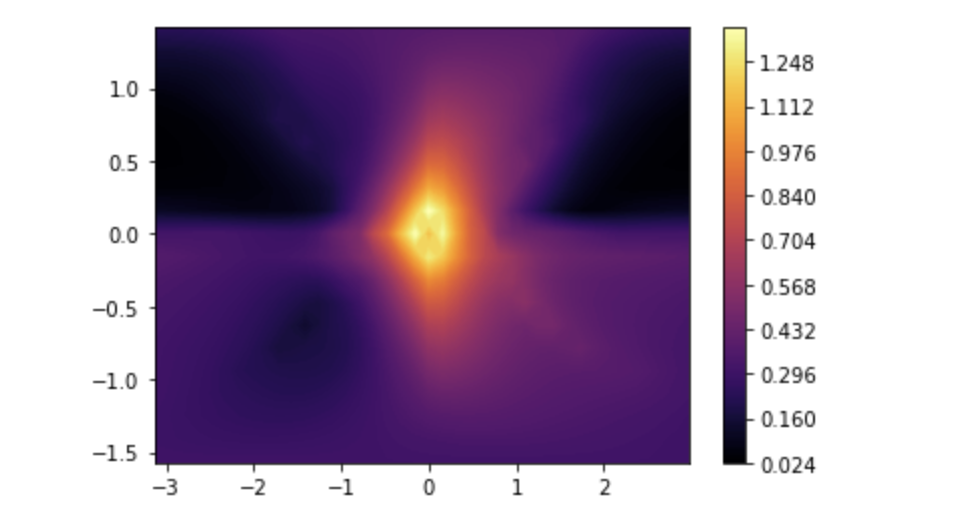

This seems to at least kind of match:






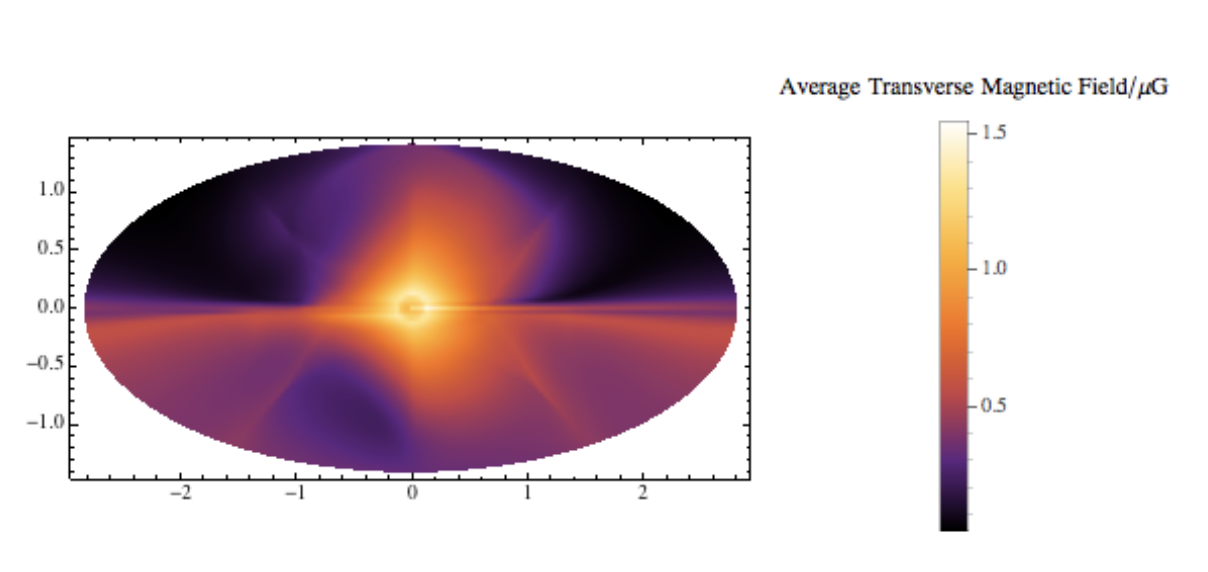


Is this enough to be convinced that I have got the magnetic field model right? How can I fix the problems with the integrals that it is showing? Most of the inconsistency seems to be in the direction away from the galactic centre at negative latitudes. Our plot is underestimating the average field in these directions.

Anyhow we now proceed with definining the free electron density model 

In [1312]:
Ro=8.5 
hthick= 1.1

In [1313]:
def nthick(a):
    return 1.77*10**(-2)*(np.cosh(Ro/15.4))**2/(np.cosh(a[0]/15.4))**2*1/(np.cosh(a[2]/hthick))**2

In [1314]:
def nthin(a):
    return 1.07*10**(-2)*(np.cosh(Ro/3.6))**2/(np.cosh(a[0]/3.6))**2*1/(np.cosh(a[2]/0.04))**2

In [1315]:
def ne(a):
    if nthin(a)+nthick(a)>10**(-7):
        return nthick(a)+nthin(a)
    else:
        return 10**(-7)


Now ne(a) is in cylindrical coordinates with origin at the galactic centre so we succesively apply scalfcytoca ,scalfgctoec, and scalfcatosp to get it in spherical coordinates with the origin at the earth

In [1316]:
nefinal=scalfcatosp(scalfgctoec(scalfcytoca(ne)))

Now we come to the hydrogen density and repeat the same process pretty much

In [1317]:
def nHI(a):
    if a[0]>=2.75:
        return 0.32*np.exp(-a[0]/18.24-abs(a[2])/0.52)
    else:
        return 0

In [1318]:
def nH2(a):
    return 4.06*np.exp(-a[0]/2.57-abs(a[2])/0.08)

In [1319]:
def nH(a):
    return 2*nH2(a)+nHI(a)

In [1320]:
nHfinal=scalfcatosp(scalfgctoec(scalfcytoca(nH)))

In [1321]:
def nevar(r,theta,phi):
    a=np.array([r,theta,phi])
    return nefinal(a)*10**(6)

In [1322]:
def nHvar(r,theta,phi):
    a=np.array([r,theta,phi])
    return nHfinal(a)*10**(6)

Hence $nHvar(r,\theta,\phi)$ is the total hydrogen atom density and  $nevar(r,\theta,\phi) $ is the free electron density in spherical coordinates with center at Earth as we desired

We must now find the effective interstellar photoelectric absorption cross-section $\sigma_{eff}$ as in https://adsabs.harvard.edu/full/1983ApJ...270..119M

In [1323]:
c0=352.2 
c1=18.7
E=3.55

In [1324]:
sigma=(c0+c1*E)/E**3

In [1325]:
def taoSI(r,theta,phi):
    return sigma*nHvar(r,theta,phi)*10**(-4)


In [1326]:
import scipy as sci

We now define some more parameters

In [1327]:
e=sci.constants.elementary_charge
hbar=sci.constants.hbar
e0=sci.constants.epsilon_0

In [1328]:
me=sci.constants.m_e
w=E*1000*e/hbar

In [1329]:
def wpl(r,theta,phi):
    return np.sqrt(nevar(r,theta,phi)*e**2/(me*e0))

In [1330]:
ma=0

In [1331]:
deltaa=-ma**2/w

In [1332]:
def deltag(r,theta,phi):
    return -wpl(r,theta,phi)**2/(2*w)

In [1333]:
M=10**(13)*10**(9)*e

In [1334]:
def deltax(r,theta,phi):
    return -bmagtheta(r,theta,phi)*10**(-10)/(2*M) #Bx is -ve of Btheta and 1 uG=10^(-10) T

In [1335]:
def deltay(r,theta,phi):
    return bmagphi(r,theta,phi)*10**(-10)/(2*M) #By is Bphi

In [1336]:
def deltaF(r,theta,phi):
    return 0

In [1337]:
def Hmat(r,theta,phi):
    a=np.array([[deltag(r,theta,phi),deltaF(r,theta,phi),deltax(r,theta,phi)],[deltaF(r,theta,phi),deltag(r,theta,phi),deltay(r,theta,phi)],[deltax(r,theta,phi),deltay(r,theta,phi),deltaa]])
    b=np.array([[1j*taoSI(r,theta,phi)/2,0,0],[0,1j*taoSI(r,theta,phi)/2,0],[0,0,0]])
    return a-b
    
    

In [1338]:
Hmat(0,0,0)

array([[-8.37932086e-12-233.00909192j,  0.00000000e+00  +0.j        ,
         2.23969452e-15  +0.j        ],
       [ 0.00000000e+00  +0.j        , -8.37932086e-12-233.00909192j,
         1.15392805e-14  +0.j        ],
       [ 2.23969452e-15  +0.j        ,  1.15392805e-14  +0.j        ,
         0.00000000e+00  +0.j        ]])

In [1339]:
def P(r,theta,phi):
    x=np.linspace(0,r,4000)
    delz=(x[1]-x[0])*3.086*10**(19)
    pmat=np.array([[0,0,0],[0,0,0],[0,0,1]])
    for i in range(3998,-1,-1):
        pmat=sci.linalg.expm(-1j*delz*Hmat(x[i],theta,phi))@pmat@sci.linalg.expm(1j*delz*np.conj(Hmat(x[i],theta,phi)).T)
    P=np.absolute(pmat[1,1])**2+np.absolute(pmat[0,0])**2
    return P
        
    